Group 15: Michelle Deng, Enye Botha, Ben Hall, Ron Degani

**Problem Statement**:
Given a person's number of minutes engaging in physical activity, their stress levels, and the quality of their sleep the night before, construct a model that predicts how long that person slept that night.

**Variables and Parameters**:

$$
\begin{align}
\begin{array}{c}
\textbf{Description} & \textbf{Symbol} & \textbf{Dimensions} & \textbf{Type} \\
\hline \text{Total duration slept} & D & \text{Hours} & \text{Dependent Variable} \\
\hline \text{Constant coefficient} & \beta_{0} & 1 & \text{Parameter} \\
\hline \text{Sleep Quality} & X1 & \text{1} & \text{Random Variable} \\
\hline \text{Sleep Quality coefficient} & \beta_{1} & 1 & \text{Parameter} \\
\hline \text{Self reported stress level} & X2 & 1 & \text{Random Variable} \\
\hline \text{Stress level coefficient} & \beta_{2} & 1 & \text{Parameter} \\
\hline \text{Physical activity} & X3 & \text{Minutes} & \text{Random Variable} \\
\hline \text{Physical activity coefficient} & \beta_{3} & 1 & \text{Parameter} \\
\hline \text{Error} & \epsilon & 1 & \text{Random Variable}
\end{array}
\end{align}
$$





**Assumptions and Constraints**:

- The model follows the linear model $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \varepsilon$
- The average value of the error is 0: i.e., $\mathbb{E}(\epsilon_i) = 0$ for all $i$
- The variance of the error is constant: i.e., $\textrm{Var}(\epsilon_i) = \sigma^2$ for all $i$.
- The error $\vec{\epsilon}$ is a random sample from the normal distribution of zero mean and variance $\sigma^2$.
- The error is independent for each $\epsilon_i$ for all $i$
- Every person is truthful in their reports
- The self-reported levels of stress and quality of sleep are accurate, realistic, and consistent over the duration of sleep
- The scales of the self-reported stress and sleep quality levels are the same for person answering
- The duration of sleep is only affected by these features

**Build Solutions**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import linear_model


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/bothaenye/Modeling-Assignment-Two/main/Sleep.csv')

In [ ]:
# using linregress
y = df["Duration"]
x1 = df["Quality"]
x2 = df ["Stress"]
x3 = df["Physical_Activity"]
beta1, beta0, r, pvalue, stderr = linregress([x1, x2, x3], y)
X = np.column_stack([x1,x2,x3])
Y = np.array(y).reshape((len(y),1))
model = LinearRegression().fit(X,Y)
print(model.coef_)
print(model.intercept_)

[[ 0.49809759 -0.06071637  0.00241388]]
[3.67370749]


In [ ]:
# using LinearRegression
X = df[['Quality','Stress','Physical_Activity']]
Y = df['Duration']

reg = linear_model.LinearRegression().fit(X,Y)

r = reg.score(X,Y)
print('b0:', reg.intercept_)
print('b1,b2,b3:', reg.coef_)
print('R square:',r)
n = len(Y)
k = X.shape[1]

R2_adj = 1 - ((1-r)*(n-1)/(n-k-1))
print('R square adjusted:', R2_adj)

b0: 3.673707492452861
b1,b2,b3: [ 0.49809759 -0.06071637  0.00241388]
R square: 0.7850526103264366
R square adjusted: 0.7833097936534077


In [ ]:
X = sm.add_constant(X)

reg_0 = sm.OLS(Y, X).fit()

summary_table = reg_0.summary()
print(summary_table)



                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     450.5
Date:                Sat, 06 Dec 2025   Prob (F-statistic):          4.13e-123
Time:                        23:37:57   Log-Likelihood:                -157.20
No. Observations:                 374   AIC:                             322.4
Df Residuals:                     370   BIC:                             338.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.6737      0.40

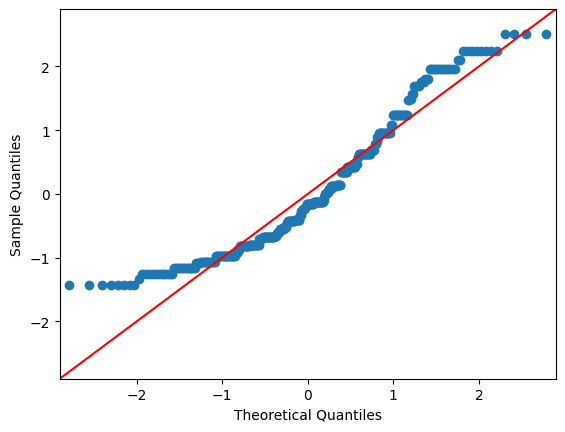

In [ ]:
residuals_0 = reg_0.resid

sm.qqplot(residuals_0,fit=True, line="45")

plt.show()


In [ ]:
# using LinearRegression
#df["Stress"] = df["Stress"]**(1/2)
#df["Duration"] = (df["Duration"])**(1/2)
df["Duration"] = np.log(df["Duration"])
df["Stress"] = (df["Stress"])**(2)
#df["Quality"] = np.log(df["Quality"])
df["Quality"] = (df["Quality"])**(2)

X = df[['Quality','Stress','Physical_Activity']]
Y = df['Duration']


#reg = linear_model.LinearRegression().fit(X,Y)

X = sm.add_constant(X)

reg_1 = sm.OLS(Y, X).fit()

summary_table = reg_1.summary()
print(summary_table)


                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     509.4
Date:                Sat, 06 Dec 2025   Prob (F-statistic):          5.78e-131
Time:                        23:37:57   Log-Likelihood:                 593.57
No. Observations:                 374   AIC:                            -1179.
Df Residuals:                     370   BIC:                            -1163.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.7214      0.02

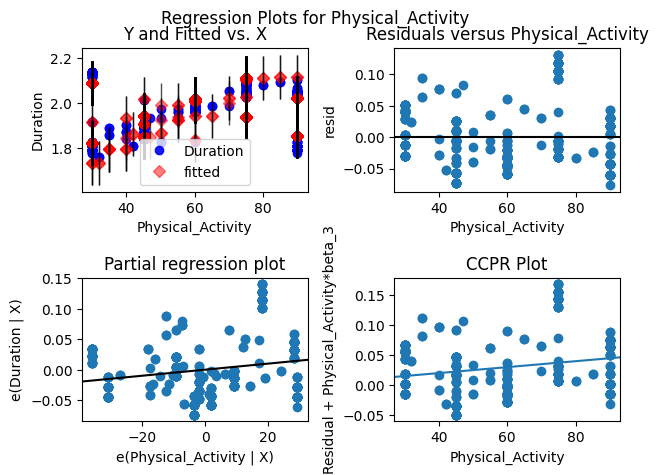

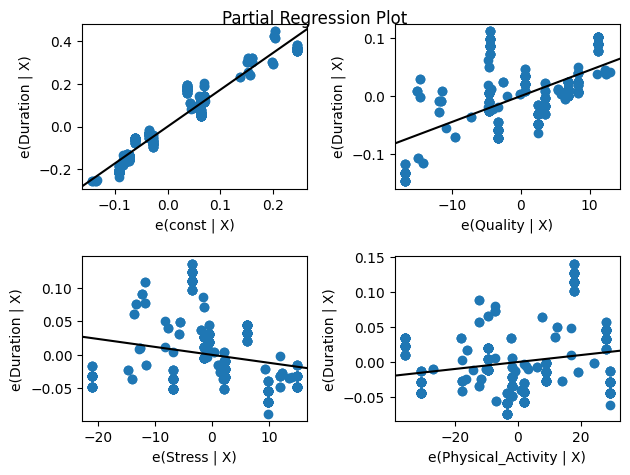

In [ ]:
# sm.graphics.plot_regress_exog(reg_1,"Duration")
# plt.show()

# sm.graphics.plot_regress_exog(reg_1,"Stress")
# plt.show()

sm.graphics.plot_regress_exog(reg_1,"Physical_Activity")
plt.show()

sm.graphics.plot_partregress_grid(reg_1)
plt.show()

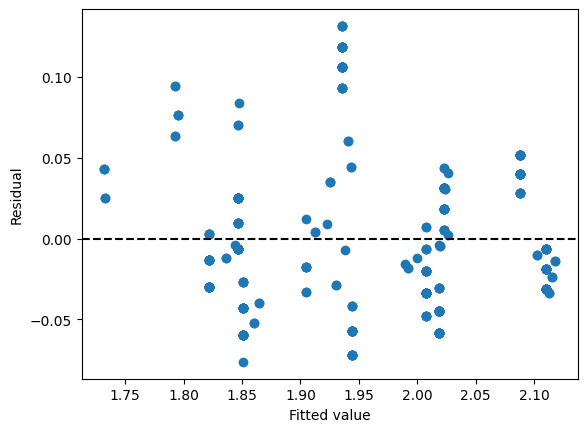

In [ ]:
fitted_y_1 = reg_1.fittedvalues

residuals_1 = reg_1.resid

plt.scatter(fitted_y_1,residuals_1)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

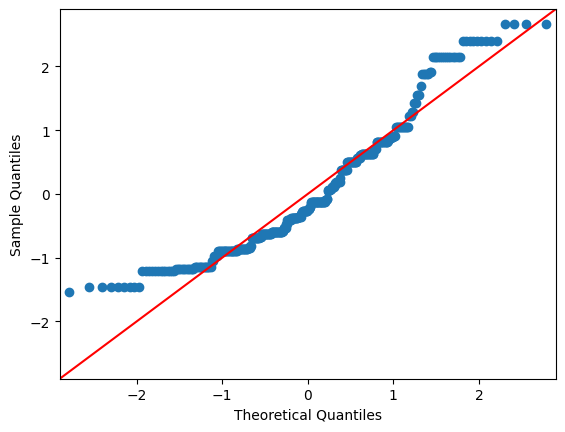

In [ ]:
sm.qqplot(residuals_1,fit=True, line="45")

plt.show()

**Analysis and Results**

The fitted regression model that we found before transforming the data was $$\text{Sleep Duration}= 3.674 + 0.498* \text{Sleep Quality} -0.061 * \text{Stress Level} +  0.002* \text{Physical Activity}$$
The transformed fitted regression model that we calculated was $$\ln(\text{Sleep Duration})= 1.7214 + 0.0045* \text{Sleep Quality}^2 -0.0012 * \text{Stress Level}^2 +  0.0005* \text{Physical Activity}$$

While we can see that the X-values in Sleep Quality and Stress Level are both squared, our model remains linear as the $β$-values enter the model linearly.

We started by running our linear regression model on the untransformed data, which yielded a $R_{adj}^2$ value of 0.783. We then examined all 27 possible linear models. The best one that we found was by transforming the response variable and two covariates: the natural log of Duration, and the squares of both Stress Level and Sleep Quality. With this transformation, the new $R_{adj}^2$ value became 0.804, demonstrating slight improvement in the model.

After applying these transformations we generated a QQ plot, which showed the residuals having tails that deviate from the 45° line. This is similar to our QQ plot generated from our non-transformed regression. Upon further inspection, the two plots appear identical. Both violate our residual assumption of normality, as it shows that the residuals do not follow a normal distribution. Our null hypothesis is that the residuals are normally distributed. Using a conventional p-value of 0.05, the value of Prob(Omnibus) < 0.05 indicates a rejection of the null hypothesis. This matches our QQ plot observations.


Our residual vs. fitted plot violated no assumptions, as the mean of the residuals roughly approximates at zero for the last four levels, and we note the graph has six distinct lines, corresponding to 6 distinct levels for each covariate. For the first two levels, there are only five points in total, so we ignored the fact that they both lie above zero, given limited data points in general. Another possiblity is that the linear model underpredicts, which could be a indication of a possible interaction term between covariates. This is beyond the scope of the course, but we could address it by adding an interaction term between Sleep Quality and Stress Level.


Looking at our partial regression graphs, we can see that overall, the points are more randomly scattered, with a roughly equal amount of points above and below the x-axis. Similarly, we can also see that the graphs with Sleep Quality and Stress Level showing vertical lines, however within each vertical line the points seem to be randomly distributed above and below. Overall the assumptions seem to be satisfied here, although not all of the graphs were ideal.

Moreover, the Durbin-Watson value displayed in our summary table for our regression model indicates that the error is likely not independent, as a DW value approaching two is a sign of independence, and ours is 0.745, less than half the optimal score. This violates another requirement of error in linear regression models.

In future iterations, we could explore whether a different type of model would benefit this problem more. Furthermore we could explore how the accuracy of each of the Stress Level and Quality Ratings affect our model, as in real life, it may be difficult to accurately assess these factors. In our model, we assumed that these factors would be consistent for the duration of sleep, however this isn't necessarily true. There is a similar issue with the Physical Activity variable as we assume that the level of physical activity is consistent across all participants. These differences may cause our models predictions to differ significantly from real life situations. We could also experiment with ordered quantile normalization to force a normal distribution in the data.